<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Models-of-Random-Walks" data-toc-modified-id="Models-of-Random-Walks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Models of Random Walks</a></span><ul class="toc-item"><li><span><a href="#RW-1" data-toc-modified-id="RW-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>RW 1</a></span></li><li><span><a href="#RW-2" data-toc-modified-id="RW-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>RW 2</a></span></li><li><span><a href="#RW-3" data-toc-modified-id="RW-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>RW 3</a></span></li></ul></li><li><span><a href="#Introduction-to-ARCH-type-Models" data-toc-modified-id="Introduction-to-ARCH-type-Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction to ARCH-type Models</a></span><ul class="toc-item"><li><span><a href="#General-Prescription" data-toc-modified-id="General-Prescription-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>General Prescription</a></span></li><li><span><a href="#Conditional-Heteroskedasticity" data-toc-modified-id="Conditional-Heteroskedasticity-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Conditional Heteroskedasticity</a></span></li><li><span><a href="#Standardisation" data-toc-modified-id="Standardisation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Standardisation</a></span></li><li><span><a href="#Common-Variance-Processes" data-toc-modified-id="Common-Variance-Processes-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Common Variance Processes</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Getting-the-Data" data-toc-modified-id="Getting-the-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Getting the Data</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>EDA</a></span></li></ul></li><li><span><a href="#Fitting-Various-Models-to-Log-Returns" data-toc-modified-id="Fitting-Various-Models-to-Log-Returns-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fitting Various Models to Log-Returns</a></span><ul class="toc-item"><li><span><a href="#Choosing-the-Distribution-of-the-Standarised-Residuals" data-toc-modified-id="Choosing-the-Distribution-of-the-Standarised-Residuals-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Choosing the Distribution of the Standarised Residuals</a></span></li><li><span><a href="#Choosing-the-Mean-Model" data-toc-modified-id="Choosing-the-Mean-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Choosing the Mean Model</a></span></li><li><span><a href="#Choosing-the-Volatility-Model" data-toc-modified-id="Choosing-the-Volatility-Model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Choosing the Volatility Model</a></span></li></ul></li><li><span><a href="#Forecasting" data-toc-modified-id="Forecasting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Forecasting</a></span><ul class="toc-item"><li><span><a href="#Forecasting-the-Adjusted-Close" data-toc-modified-id="Forecasting-the-Adjusted-Close-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Forecasting the Adjusted Close</a></span></li><li><span><a href="#Terminal-Distribution-of-the-Forecasts" data-toc-modified-id="Terminal-Distribution-of-the-Forecasts-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Terminal Distribution of the Forecasts</a></span></li><li><span><a href="#Comparision-with-the-Realisation" data-toc-modified-id="Comparision-with-the-Realisation-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Comparision with the Realisation</a></span></li></ul></li></ul></div>

In these notes, we describe fitting a GARCH model to real financial data. We begin with a quick survey of different models of random walks and why GARCH models are required. We follow this with a brief description of GARCH-type models in which we fix the notation that we use.

The bulk of the project will be spent on analysing and fitting a GARCH-type model to historic S&P500 data. We cover exploratory data analysis (EDA), model specification including (various statistical tests), and forecasting.

# Models of Random Walks

A general model of a process $r_t$ can be written in the form

$$
r_t = \mu_t + \epsilon_t\,,
$$

where $\mu_t$ is a mean-model such as a constant mean, OLS, ARMA etc. and $\epsilon_t$ are the residuals of the model. Typically, a model is deemed a good fit to the data if the residuals follow some kind of random walk. Campbell, Lo and MacKinley distinguish three forms of random walk models where $\epsilon_t$ are respectively

(RW 1) homoskedastic, iid residuals: $\epsilon_t \sim iid(0, \sigma^2)$;<br>
(RW 2) independent process (allows for unconditional heteroskedasticity);<br>
(RW 3) uncorrelated process (allows for non-linear structures in $\epsilon_t$).

## RW 1


An example of the first is given by ordinary least squares (OLS) where it is further common, though not necessary, to specify $\epsilon_t \sim N(0, \sigma^2)$ for constant variance $\sigma^2$ of the residuals. Such models are simple to fit and analyse but are often insufficient for describing real-world phenomena (particuarly finance) where residual often exhibit leptokurtic distributions.

## RW 2

An example of the second type of random walk is the Heston model (stochatic volatility model)

$$
\begin{align}
\textrm{d} S_t & = \mu S_t \textrm{d}t + \sqrt{v_t} S_t \textrm{d} W_t^{(1)}\,,\\
\textrm{d} v_t & = \kappa (\theta - v_t) \textrm{d} t + \xi \sqrt{v_t} \textrm{d} W_t^{(2)}\,.
\end{align}
$$

The details and an implementation are given in a separate notebook. For our purposes, it suffices to note that $W_t^{(1)}$ and $W_t^{(2)}$ are Wiener processes with *independent* Gaussian increments:

$$
W_{t + \tau} - W_t \sim N(0, \tau)
$$

Consequently, the unconditional variance is non-constant, $\mathbb{V}[W_t] = t$, and thus introduces *unconditional* heteroskedasticity. The increments of the variance process are independent but not identically distributed (inid). However, since the increments are independent, any disjoint increments are uncorrelated and any functions of disjoint increments vanishes:

$$
\text{Cov}(f(W_t - W_s), g(W_v - W_u)) = 0 \qquad \text{for any } f, g \text{ and independent } [u,v], [s,t]\,.
$$

Because of the independence of the increments, models that rely on this type of random walk fail to capture *volatility clustering* that is observed in financial data (wherein large changes in prices are typically followed by large changes, of either sign).

## RW 3

The third type of random walk is the weakest, requiring only conditionally heteroskedastic increments in $\epsilon_t$. In general, the process is allowed to be conditional on itself or on other random variables, allowing it to capture non-linear dynamics that RW 2 fails to capture.

This gives non-trivial dynamics to the squares of the residuals which give rise to heteroskedastic volatility of the residuals. Models that describe volatility through this mechanism are called ARCH (AutoRegressive Conditional Heteroskedasticity) models or GARCH (generalised ARCH) models. In short, such models were designed to capture volatility clustering by allowing the volatility to depend on its past values (as well as other random variables).

We shall focus on this class of models in these notes.

# Introduction to ARCH-type Models

## General Prescription

We consider a general model of a process $r_t$ that splits it into a mean process $\mu_t$ and its residuals $\epsilon_t$:

$$
r_t = \mu_t + \epsilon_t\,.
$$

There are few restrictions on the mean process and it can be anything from a simple constant-mean process to a full $\text{ARMA}(p,q)$ model. However, in order for an ARCH-type model to be applicable, we impose some reqirements on $\epsilon_t$: 

1) Zero mean: $\mathbb{E}[\epsilon_t] = 0$ <br>
2) Constant unconditional variance: $\mathbb{E}[\epsilon_t^2] = \sigma^2$<br>
3) No autocorrelation (RW 3): $\text{Cov}(\epsilon_s, \epsilon_t) = \mathbb{E}[\epsilon_s \epsilon_t] = 0$

However, we allow the *squares* of the residuals to be autocorrelated (note that this would not be possible if we had specified *independence* of the residuals, as in RW 2). In the case of an $\text{ARCH}(p)$ model, we specify the process

$$
\epsilon_t^2 = \alpha_0 + \sum_{i=1}^p \alpha_i \epsilon^2_{t-i} + u_t\,,
$$

where $u_t$ is a white noise process.

## Conditional Heteroskedasticity

The above specification allows for *conditional heteroskedasticity*. We first define the conditional variance of the residuals as

$$
h_t^2 = \mathbb{E}[\epsilon_t^2 \, |\, I_{t-1}]\,,
$$

where $I_t$ denotes the entire information set at time $t$. Since this includes knowledge of all past values of the residuals, it follows that the conditional variance is given by (note the time indexes)

$$
\mathbb{E}[\epsilon_{t-i}^2 \, | \, I_t] = \begin{cases}
\epsilon_{t-i}^2\,, \text{ if } i \geq 1\,,\\
0\,, \text{ if } i \leq 0\,.
\end{cases}
$$

Consequently, the conditional variance follows the non-constant process
$$
h_t^2 = \alpha_0 + \sum_{i=1}^p \alpha_i \epsilon_{t-i}^2\,,
$$

which allows one to capture heteroskedasticity.

In this notation, it is common to denote the conditional distribution of the residuals as $\epsilon_t \, | \, I_{t-1} \sim f(0, h_t^2)$ where $f$ is some zero-mean distribution. Often, this is taken to be a normal distribution (in which case we have $\epsilon_t \, | \, I_{t-1} \sim N(0, h_t^2)$) but it is also relatively common to specify a Student-$t$ distribution, or some other distribution, to describe leptokurtic residuals.

## Standardisation

In practise, we standardise the distributions by defining

$$
\epsilon_t = \sigma_t z_t\,,
$$

where $z_t$ is now iid $f(0,1)$-distributed. We stress that $\sigma^2 \neq \sigma_t^2$; the former is the constant unconditional variance of the mean-model residuals and the latter is the stochastic standardised conditional variance of those residuals.

In these notes, $\sigma_t^2$ is the standardised version of the conditional variance process $h_t^2$ and we shall demand that $\sigma_t^2$ follows an $\text{AR}(p)$ process in an ARCH model and a $\text{ARMA}(p,q)$ model in a GARCH model.

To recap, a basic ARCH-type model of a process $r_t$ is of the form

$$
r_t = \mu_t + \epsilon_t = \mu_t + \sigma_t z_t
$$

and is specified by 

1. a mean model $\mu_t$;<br>
2. a volatility process $\sigma_t$;<br>
3. a distribution for the iid standardised residuals $z_t$.

## Common Variance Processes

If the variance process is taken to be an $\text{AR}(p)$ process,

$$
\sigma_t^2 = \omega + \sum_{i=1}^p \beta_i \sigma^2_{t-i}\,,
$$

the model is called an $\text{ARCH}(p)$ model.

---

If the variance process is taken to be an $\text{ARMA}(p,q)$ model,

$$
\sigma_t^2 = \omega + \sum_{i=1}^p \beta_i \sigma^2_{t-i} + \sum_{j=1}^q \alpha_j \epsilon^2_{t-j}\,,
$$

the model is called a $\text{GARCH}(p,q)$ model.

---

If the variance process accounts for an asymmetry in the effect of positive and negative shocks under the prescription

$$
\sigma_t^2 = \omega + \sum_{i=1}^q \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^p \beta_j \sigma_{t-j}^2 + \sum_{k=1}^o \gamma_k \epsilon_{t-k}^2 I_{\epsilon_{t-k} < 0}\,,
$$

where $I_{\epsilon_{t-k} < 0}$ is an indicator function for the lagged residual $\epsilon_{t-k}$, the model is called a $\text{GJR-GARCH}(o,p,q)$ model (*Glosten-Jagannathan-Runkle GARCH model*).

---

If the variance process is specified by a *volatility* process of the form

$$
\sigma_t = \omega + \sum_{i=1}^q \alpha_i |\epsilon_{t-i}| + \sum_{j=1}^p \beta_j |\sigma_{t-j} |\,,
$$

then the model is called a $\text{TARCH}(p,q)$ model (*threshold ARCH model*).

More generally, it is possible to specify other powers $\kappa$ to demand that the volatility follows the dyanamics

$$
\sigma_t^\kappa = \omega + \sum_{i=1}^q \alpha_i {|\epsilon_{t-i}|}^\kappa + \sum_{j=1}^p \beta_j {|\sigma_{t-j}|}^\kappa\,,
$$

with conditional variance given by ${(\sigma_t^\kappa)}^{2/\kappa}$. We shall call these *power GARCH models*.

---

We shall consider the family of ARCH-like models encompassing the models above and denote them $\text{ARCH}(o,p,q,\kappa)$ models. Evidently:

* $\text{ARCH}(p) \equiv \text{ARCH}(0,p,0,2)$;
* $\text{GARCH}(p,q) \equiv \text{ARCH}(0,p, q, 2)$;
* $\text{GJR-GARCH}(o,p,q) \equiv \text{ARCH}(o,p,q,2)$;
* $\text{TARCH}(o,p,q) \equiv \text{ARCH}(0,p,q,1)$.


# Imports

In [1]:
import arch
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import scipy.stats as stats
import seaborn as sns
import skewstudent as skewt
import statsmodels.api as sm
import statsmodels.distributions as sd
import statsmodels.tsa as st

plt.style.use('fivethirtyeight')
sns.set(font_scale = 1.5)
%matplotlib inline

# Getting the Data

We shall get 20 years worth of historic data and use it to simulate one calendar month worth of data.

In [2]:
data_start_date = pd.to_datetime('2000/01/01')
data_end_date = pd.to_datetime('2019/12/31')

In [3]:
sp500 = web.get_data_yahoo('SPY', start = data_start_date, end = data_end_date)

## EDA

We first check the columns and index:

In [4]:
sp500.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,321.519989,320.899994,321.470001,321.230011,20270000.0,316.685272
2019-12-26,322.950012,321.640015,321.649994,322.940002,30911200.0,318.371063
2019-12-27,323.799988,322.279999,323.739990,322.859985,42528800.0,318.292175
2019-12-30,323.100006,320.549988,322.950012,321.079987,49729100.0,316.537384
2019-12-31,322.130005,320.149994,320.529999,321.859985,57077300.0,317.306335


Currently the frequency of the index is set to `None`:

In [5]:
print(sp500.index.freq)

None


Since we are dealing with financial data, we shall set the frequency to bussiness day:

In [6]:
def reindex(df, freq = 'B'):
    """
    Re-indexes `df` to the specified frequency. Since we are dealing with
    daily financial data, the default is to business day.
    
    Parameters
    ----------
    df : Pandas object
        Pandas object to be reindexed (pd.DataFrame or pd.Series)
        
    freq : str, optional
        Frequency to reindex to.
        
    Returns
    -------
    Reindexed object
    """
    new_freq = pd.date_range(start = df.index[0],
                             end = df.index[-1],
                             freq = freq)
    return df.reindex(new_freq)

In [7]:
sp500 = reindex(sp500, freq = 'B')

Checking for NA values we see that, of the 5217 entries, only 5031 are non-null:

In [8]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5217 entries, 2000-01-03 to 2019-12-31
Freq: B
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5031 non-null   float64
 1   Low        5031 non-null   float64
 2   Open       5031 non-null   float64
 3   Close      5031 non-null   float64
 4   Volume     5031 non-null   float64
 5   Adj Close  5031 non-null   float64
dtypes: float64(6)
memory usage: 285.3 KB


A useful way to visualise the distribution of missing data is to use a heatmap:

In [9]:
def plot_missing_data(df, date_only = True):
    """
    Plots a heatmap of the data, showing any missing data in yellow.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing data to check for missing values.
        
    date_only : bool
        `True` plots the date of the index only.
        `False` plots the full timestamp. Useful for intra-day data.
        
    Returns
    -------
    fig : plt.figure.Figure
        Figure instance.
        
    ax : plt.axes.Axes
        Axes containing heatmap.
    """
    if date_only:
        df = df.reindex(df.index.date)
    fig, ax = plt.subplots(figsize = (12, 8))
    params = {'cbar': False,
              'cmap': 'viridis'}
    sns.heatmap(df.isnull(), ax = ax, **params)
    ax.set_title('Heatmap of Data')
    return fig, ax

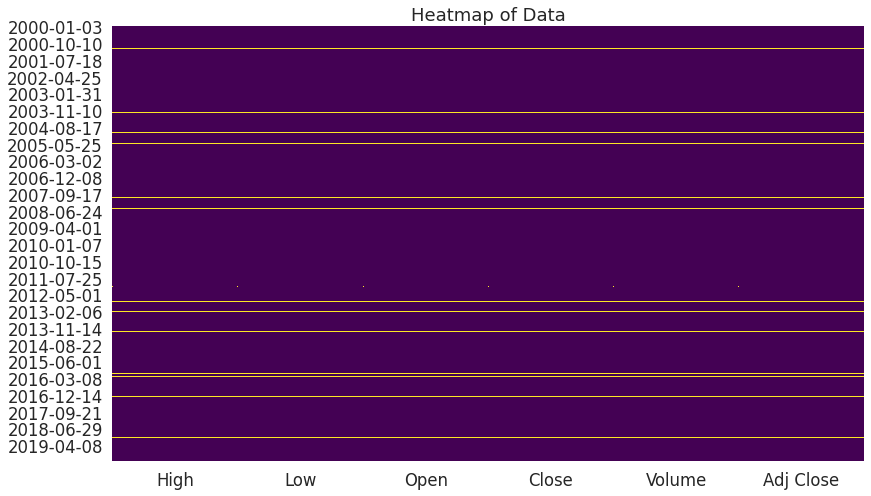

In [10]:
_ = plot_missing_data(sp500)

The above heatmap illustrates the positions of the missing data points in yellow. We see that, wherever there is missing data, it is missing across all 6 columns. It is easy to deduce that the 187 missing values are stock market holidays (of which there are approximately 9 a year in the US) over which there is no trading. As such, it is safe to forward fill the data to fill in the NA values:

In [11]:
sp500 = sp500.fillna(method = 'ffill')

The raw values of the adjusted close are not stationary and so we shall work with the daily log-returns instead.

In [12]:
def raw_to_log_returns(ser, dropna = True):
    """
    Converts raw values to log-returns, optionally dropping
    the missing enetry generated by `shift()`.
    
    Parameters
    ----------
    ser : pd.Series
        Series of raw values to compute log returns for.
    
    bool : dropna
        Bool to denote whether to remove the leading NA generated
        by `shift`
        
    Returns
    -------
    pd.Series
        Series of log-returns.
    """
    log_ret = np.log(ser / ser.shift(1))
    if dropna:
        return log_ret.dropna()
    else:
        return log_ret

In [13]:
log_returns = raw_to_log_returns(sp500['Adj Close'])

We plot the log-returns, its ACF and pACF below:

In [14]:
def visualise(ser):
    """
    Simple visualisation of a time series that plots
    1) the time series itself;
    2) the ACF;
    3) the pACF.
    
    Parameters
    ----------
    ser : pd.Series
        Series containing data being analysed.
        
    Returns
    -------
    fig : plt.figure.Figure
        Figure instance
    
    (ax1, ax2, ax3) : tuple of plt.axes.Axes
        Axes respectively containing 1) time series; 2) ACF; 3) pACF.
    """
    fig = plt.figure(figsize = (20, 12))
    ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
    ax2 = plt.subplot2grid((2,2), (1,0), colspan = 1)
    ax3 = plt.subplot2grid((2,2), (1,1), colspan = 1)
    
    # Plot time series on `ax1`, ACF on `ax2` and pACF on `ax3`. 
    ax1.plot(ser)
    sm.graphics.tsa.plot_acf(ser, ax = ax2)
    sm.graphics.tsa.plot_pacf(ser, ax = ax3)
    
    # Add info
    ax2.set_xlabel('Lag')
    ax3.set_xlabel('Lag')
    fig.suptitle('Time Series', y = 0.9, fontsize = 16)
    return fig, (ax1, ax2, ax3)

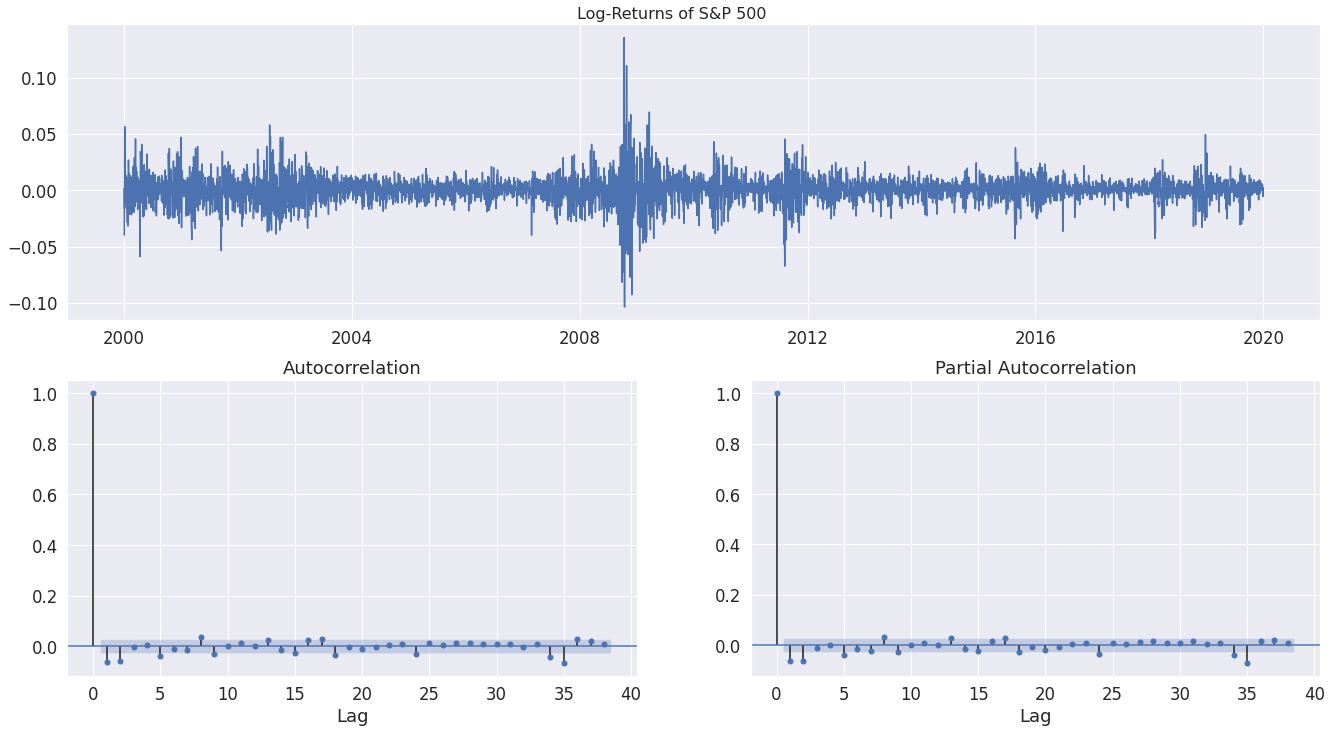

In [15]:
fig, _ = visualise(log_returns)
_ = fig.suptitle('Log-Returns of S&P 500', y = 0.9, fontsize = 16)

The time series itself looks mean-stationary but exhibits volatility clustering, suggesting a GARCH-type model. Both the ACF and the pACF only appear to exhibit weak serial correlation, suggesting that a zero-mean model (or at least a constant-mean model) should suffice for $\mu_t$.

Strictly speaking, we have statistically significant autocorrelations (as affired below) and so an AR-type mean model may be more appropirate. However, our focus in this project is on fitting the GARCH model and so we shall not worry about this too much. Indeed one may verify that fitting an $\text{AR}(2)/\text{GARCH}$ model does not appreciably improve the fit of the model over a constant-mean/GARCH model.

Analogous plots for the squared series exhibit much more significant serial correlation, suggesting a GARCH-type model:

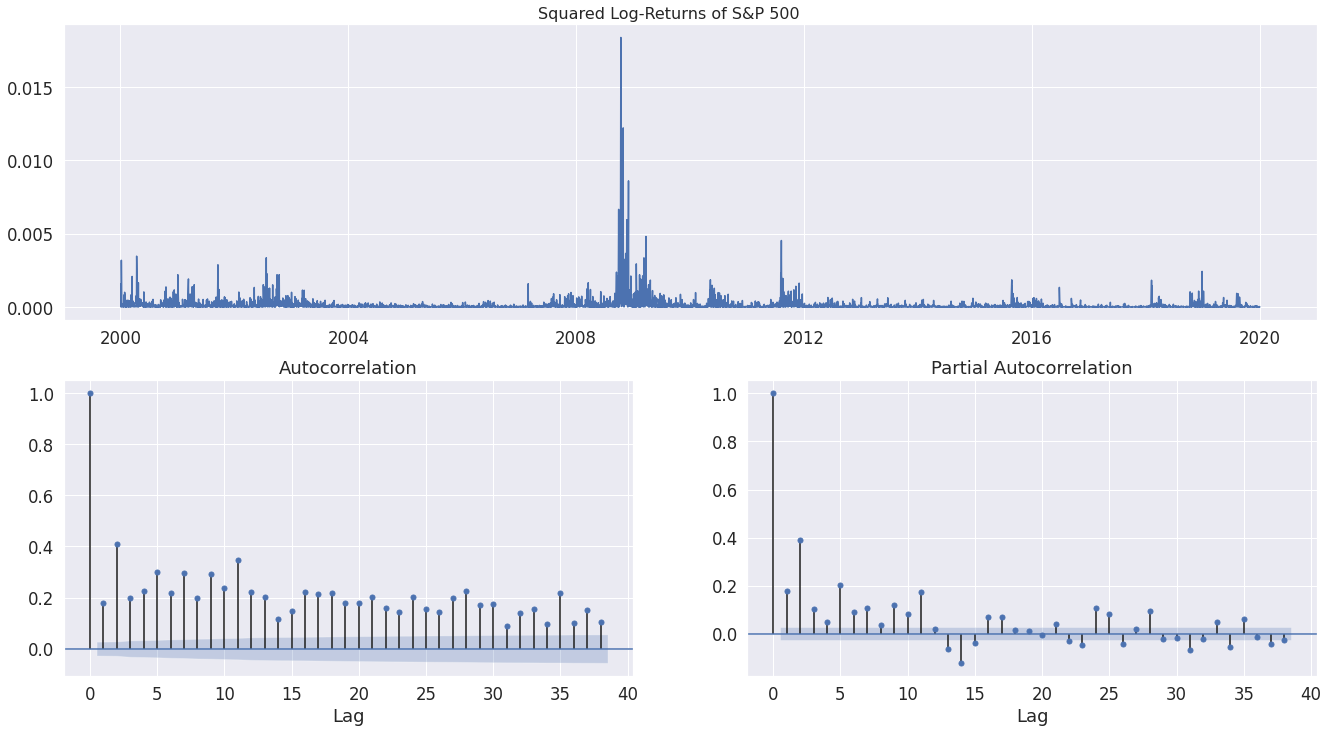

In [16]:
fig, ax = visualise(log_returns**2)
_ = fig.suptitle('Squared Log-Returns of S&P 500', y = 0.9, fontsize = 16)

As a more quantitative test of serial correlation, we define a wrapper function for the Ljung-Box test:

In [17]:
def ljung_box_test(ser, m = 20, summarise = False):
    """
    The Ljung-Box test is based on the following:
    
    H0: The first `m` autocorrelations are jointly zero.
    H1: The series exhibits serial correlation in the first `m` lags.
    
    The test statistic
    
    Q = n(n+2) \sum_{k = 1}^{m} \frac{\rho_k^2}{n-k}
    
    asymptotically follows a $\chi^2_m$ distribution under H0.
    Here, $n$ is the number of points in the data, $m$ is the 
    maxmimum lag being tested for and $\rho_k$ is the sample
    autocorrelation at lag $k$.
    
    Parameters
    ----------
    ser : pd.Series
        Data to test autocorrelation on.
    
    m : int
        Max lag to test for.
    
    summarise : bool, optional
        Whether to print extra information on the maximum p-value.
        Default behaviour is to supress the information.
        
    Returns
    -------
    pd.DataFrame
        DataFrame, indexed by number of lags (up to $m$) and columns
        `lb_stat` and `lb_pvalue` which respectively contain the value
        and p-value of the Q-statistic.
    """
    lb = sm.stats.acorr_ljungbox(ser, lags = m, return_df = True)
    
    if summarise:
        # Extract the row with the highest p-value
        # and print relevant information
        max_pval = lb.loc[lb['lb_pvalue'].idxmax()]
        print(f'Max. p-value = {max_pval["lb_pvalue"]:.3e}'
              f' at lag {max_pval.name} (n = {len(ser)})')
    return lb

Applying the `ljung_box_test` to the log_returns, we see that we must reject the null hypothesis at the 1% level (as expected from the plots)

In [18]:
lb = ljung_box_test(log_returns, summarise = True)
lb.head()

Max. p-value = 1.053e-05 at lag 1 (n = 5216)


,lb_stat,lb_pvalue
1,19.412741,1.053022e-05
2,36.495013,1.189073e-08
3,36.518697,5.817036e-08
4,36.622029,2.154927e-07
5,44.469651,1.859552e-08


but the same test on the squared series yields a much more extreme autocorrelation:

In [19]:
_ = ljung_box_test(log_returns ** 2, summarise = True)

Max. p-value = 1.747e-37 at lag 1 (n = 5216)


The ADF test returns that the series is stationarity at the 1% level:

In [20]:
def adf_test(ser, summarise = False):
    """
    Conducts an augmented Dickey-Fuller test on the series.
    
    Parameters
    ----------
    ser : pd.Series
        Series to test for stationarity.
        
    summarise : bool
        Whether to return a summary of the results or not.
        Default behaviour is to suppress this output.
        
    Returns
    -------
    adf_output : pd.Series
        Results of ADF test with critical values at 1%, 5% and 10% levels.
    """
    adf = st.stattools.adfuller(ser, autolag = 'AIC')
    idx = ['Test statistic', 'p-val', '# Lags Used', '# Observations Used']
    adf_output = pd.Series(adf[0:4], index = idx)
    for key, value in adf[4].items():
        adf_output[f'Critical Value ({key})'] = value

    if summarise:
        print(f'p-value: {adf_output["p-val"]:.3e}')
    return adf_output

In [21]:
adf_test(log_returns, summarise = True)

p-value: 5.584e-30


Test statistic         -1.730703e+01
p-val                   5.583828e-30
# Lags Used             1.700000e+01
# Observations Used     5.198000e+03
Critical Value (1%)    -3.431609e+00
Critical Value (5%)    -2.862096e+00
Critical Value (10%)   -2.567066e+00
dtype: float64

In all, we expect that a constant-mean ARCH-type model will fit the data well. We shall consider a range of different GARCH models and choose the best model (as measured by the AIC) to construct a one-month forecast of the adjusted close for the S&P500.

# Fitting Various Models to Log-Returns

## Choosing the Distribution of the Standarised Residuals

We first evaluate which distribution for the standardised residuals performs the best. For concretness, we shall standardise our tests with a constant-mean $\text{GARCH}(1,1)$ model and allow the standardised residuals to follow either a normal, Student-t or skewed t-distribution:

$$
\begin{align}
r_t & = \mu + \epsilon_t\\
\epsilon_t & = \sigma_t z_t\\
\sigma_t & = \omega + \alpha \epsilon_{t-1} + \beta \sigma_{t-1}\\
z_t & \sim\text{Normal/Student-t/Skew-t}
\end{align}
$$

We construct one model for each distribution, saving the results to a `dict`.

In [22]:
resid_dist = ['normal', 't', 'skewt']
results = dict()
aic = pd.DataFrame(index = resid_dist, columns = ['AIC'])
for dist in resid_dist:
    params = {'mean': 'Constant',
              'vol': 'Garch',
              'dist': dist,
              'p': 1,
              'q': 1,
              'power': 2}
    
    # Fit the ARCH models but supress the outputs
    model = arch.arch_model(100 * log_returns, **params).fit(disp = 'off')
    
    # Store the model for later use
    results[dist] = model

    aic.loc[dist] = [model.aic]
aic

,AIC
normal,13968.3
t,13657.8
skewt,13635.5


We see that the model with skew-t distributed standardised residuals performs the best out of the three distributions. We visualise the fit of residuals by appropriate Q-Q plots:

In [23]:
def distribution_constructor(dist, dist_params = []):
    """
    Constructs the specified *standardised* distribution with specified paramters.
    
    Parameters
    ----------
    dist : str
        Name of the distribution. Must be one of those in `implemeted_dist` below.
        
    dist_params : list
        List of parameters for `dist`.
        
    Returns
    -------
    distribution
        Instance of the specifed distributon. Return type depends on `dist`.
    """
    # Distributions that are understood by this function. Values are
    # the expected number of parameters for the *standardised* distribution.
    implemented_dist = {'normal': 0,
                        't': 1,
                        'skewt': 2}
    
    # Check if parameters are supplied as an iterable.
    try:
        iter(dist_params)
    except:
            raise ValueError(f'"dist_params" must be iterable.')
        
    # Check if `dist` is implemented
    try:
        implemented_dist[dist]
    except KeyError:
        raise NotImplementedError(f'Distribution "{dist}" not implemented.')

    # Check if `dist_params` contains the required number of parameters.
    if len(dist_params) != implemented_dist[dist]:
        raise TypeError(f'Incorrect number of parameters;'
                        + f' expected {implemented_dist[dist]},'
                        + f' got {len(dist_params)}.')

    # Case-switch for generating the theoretical distribution.
    def _normal():
        return stats.norm
    
    def _t():
        return stats.t(*dist_params)
    
    def _skewt():
        return skewt.SkewStudent(*dist_params)
    
    switcher = {'normal': _normal,
                't': _t,
                'skewt': _skewt}
    
    return switcher[dist]()


def qq_plot(standardised_residuals, dist, dist_params = [], line = '45'):
    """
    Generates Q-Q plot for `standardised_residuals`, compared to
    a theoretical distribution `dist` with parameters `dist_params`.
    
    Parameters
    ----------
    standardised_residuals : pd.Series
        Standardised residuals whose Q-Q plot is to be generated.
    
    dist : str
        Name of the distribution that the residuals theoretically follow.
        
    dist_params : list
        List of parameters for `dist`.
        
    line : str, optional
        Whether to plot a guiding line or not. Accepted values are those of
        `sm.qqplot`, most commonly '45' or 'False'.
    
    Returns
    -------
    fig : plt.figure.Figure
        Figure instance.
        
    ax : plt.axes.Axes
        Axes instance containing QQ-plot.
    """
    distribution = distribution_constructor(dist, dist_params)
    
    # Plot the distribution
    fig, ax = plt.subplots(figsize = (12, 8))
    _ = sm.qqplot(standardised_residuals,
                  distribution,
                  ax = ax,
                  line = line)
    ax.set_title(f'QQ-plot of the Standarised {dist}-Distributed Residuals')
    return fig, ax

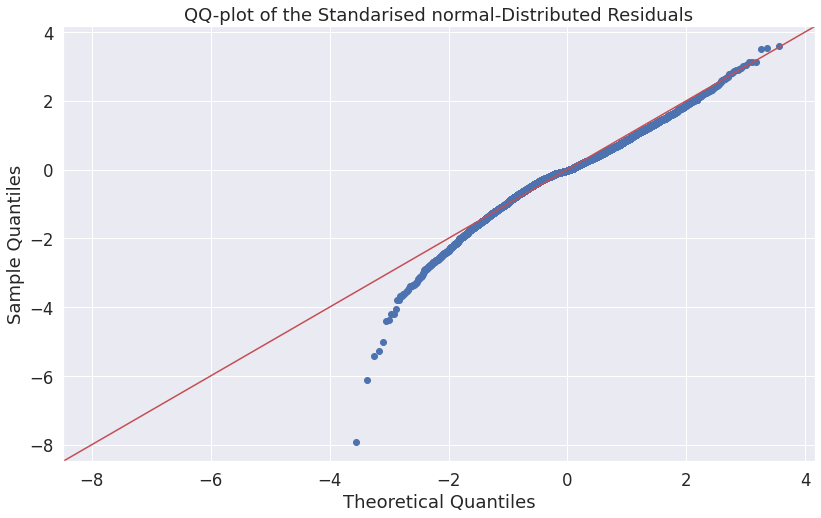

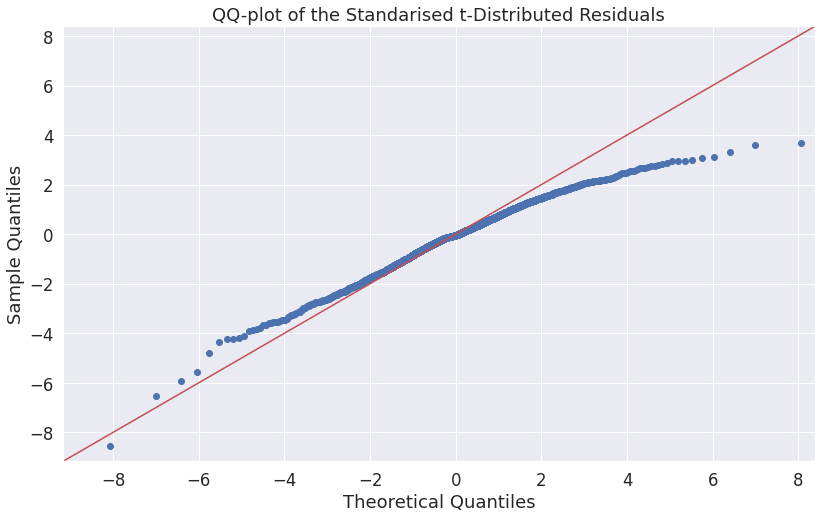

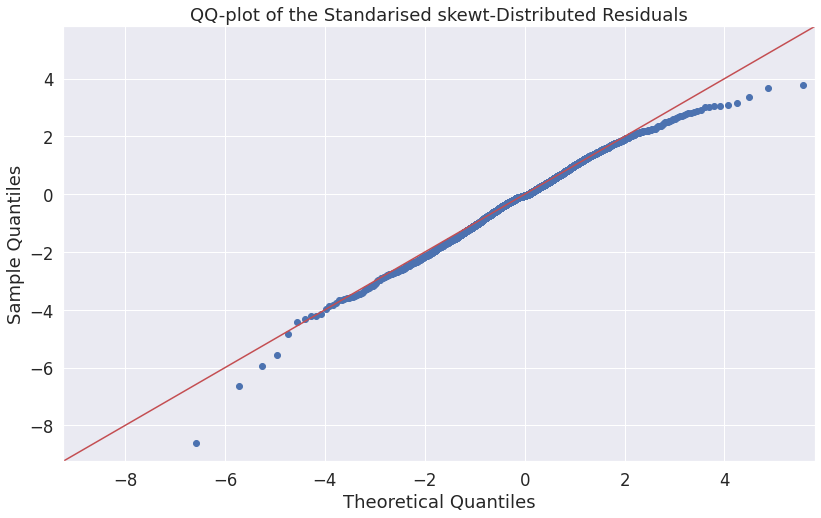

In [24]:
for dist, model in results.items():
    # Since we are keeping the mean and volatility models constant,
    # the first four parameters of each model are all the same:
    # * mean model parameters: ['mu']
    # * volatility model parameters: ['omega', 'alpha[1]', 'beta[1]']
    
    # Any other parameters in `model.params` are those of the distribution.
    # These are the ones we pass to `qq_plot()`
    _ = qq_plot(model.std_resid, dist, model.params[4:])

We see that the upper quantiles of the model with normally-distributed standardised residuals performs well but the lower quantiles fit particularly poorly. In particular, there are too few values at the lower end of the spectrum, compared to the theoretical distribution; the left tail is much longer than a normal distribution and is thus skewed left.

Specifying a $t$-distribution for the standardised residuals instead fits the lower quantiles better, at the expense of the upper residuals. Nevertheless, the AIC indicates that this tradeoff noticeably improves the model.

The final skew-$t$ distribution appears to be a compromise of the other two distributions, leading to under-fitting (though less pronounced) at both tails. Note that whilst the normal and $t$-distributions are symmetric, leading to bias in only one tail, the skew-$t$ distribution is asymmetric and distributes the fitting error more evenely between the two tails.

We shall quantify the goodeness of fit by a one-sided Kolomogorov-Smirnov test against the specified theoretical distributions. Below, we see that the `skewt` distribution produces the highest p-value (recall the null hypothesis of the KS-test is that the two distributions are identical):

In [25]:
def ks_test(ser, dist, dist_params = []):
    """
    Conducts a one-sided Kolomogorov-Smirnov test against the
    specified distribtuion.
    
    Parameters
    ----------
    ser : pd.Series
        Series on which to conduct the KS test.
    
    dist : str
        Name of the distribution that the series theoretically follow.
        
    dist_params : list
        List of parameters for `dist`.
    
    Returns
    -------
    (statistic, pvalue) : (float, float)
        Tuple of the KS statistic and associated p-value.
    """
    distribution = distribution_constructor(dist, dist_params)
    return stats.kstest(ser, distribution.cdf)

In [26]:
res = pd.DataFrame(index = resid_dist, columns = ['Statistic', 'p-value'])
for dist, model in results.items():
    ks = ks_test(model.std_resid, dist, model.params[4:])
    res.loc[dist] = [ks[0], ks[1]]
res

,Statistic,p-value
normal,0.0463756,3.60731e-10
t,0.0679595,2.3805e-21
skewt,0.0383764,4.25268e-07


Although a slight abuse of the hypothesis test, the p-value can be taken as a proxy for how indiscernable the distribution of the residuals were from the specified distributions and thus a measure of goodness of fit.

Perhaps somewhat surprisingly, the skew-$t$ distribution does not improve the goodness-of-fit as much as one might expect from the Q-Q plots. Nevertheless, we shall adopt the skew-$t$ distribution for the standardised residuals in the proceeding sections.

Below, we define a helper function to visualise the results of an ARCH fit.

In [27]:
def plot_arch_results(arch_results):
    """
    Plots
    1) the residuals of the mean model $\epsilon_t$ modelled by the ARCH model;
    2) the standardised residuals z_t after fitting the ARCH model.
    3) the conditional volatility computed by the ARCH model;
    
    Note: this is similar to the stock `ARCHModelFixedResult.plot()` method  which
    only plots the second and third plots.
    
    Parameters
    ----------
    arch_results : arch.univariate.base.ARCHModelFixedResult
        The results of a `arch.univariate.base.ARCHModel.fit()`
        
    Returns
    -------
    fig : plt.figure.Figure
        Figure instance.
        
    (ax1, ax2, ax3) : tuple of plt.axes.Axes
        Tuple of three axes instances for the three plots described above.
    """
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (12, 15), sharex = True)
    ax1.plot(arch_results.resid, linewidth = 2)
    ax2.plot(arch_results.std_resid, linewidth = 2)
    ax3.plot(arch_results.conditional_volatility, linewidth = 2)

    # Add Information
    ax1.set_title('Residuals')
    ax2.set_title('Standardised Residuals')
    ax3.set_title('Conditional Volatility')
    model = arch_results.model
    print(str(model.name))
    print(str(model.volatility))
    print(str(model.distribution))
    return fig, (ax1, ax2, ax3)

Constant Mean
GARCH(p: 1, q: 1)
Standardized Skew Student's t distribution


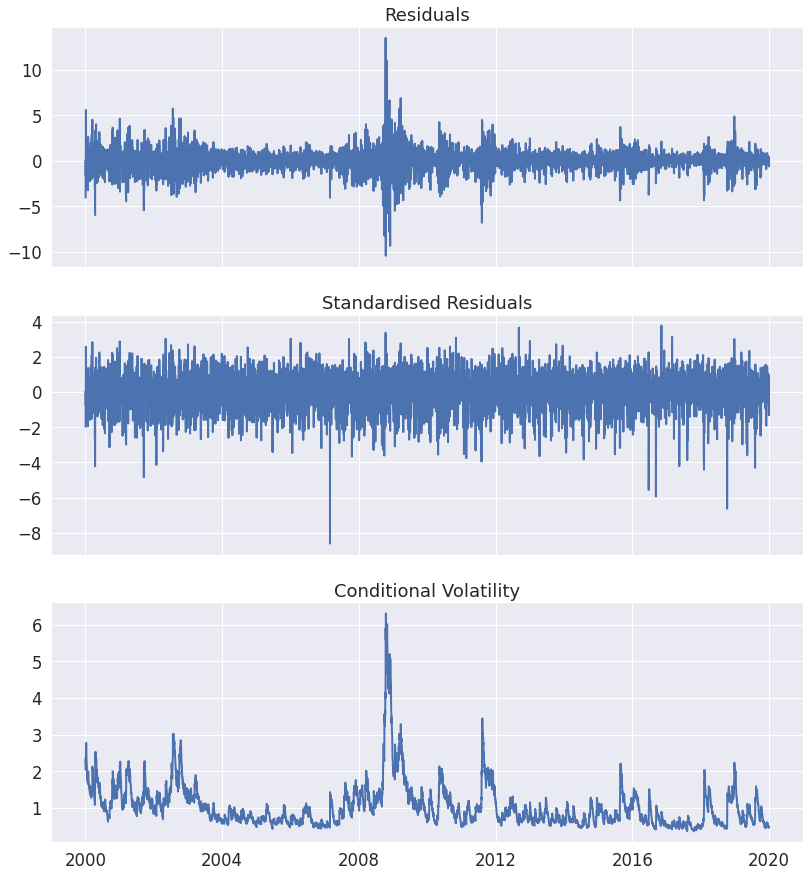

In [28]:
_ = plot_arch_results(results['skewt'])

Note that the first plot (of the residuals, here denoted $\epsilon_t$) is almost identical to the original plot of the log-returns since we fitted a constant mean model. The plot of the reisudals is thus just a vertical translation of the log-returns plot.

In all of the following models, we shall adopt skew-$t$ distributed standardised residuals.

## Choosing the Mean Model

Judging by the plot of the log-returns, one would expect a constant mean model to suffice (indeed, we employed such a model in the test above). However, it is also true that over very long horizons, the returns must tend to be slightly positive or it would not be possible to profit from investing. Indeed, plotting a very long-range rolling mean of the log-returns reveals a weak upward trend:

Text(0.5, 1.0, '2000-day Rolling Mean of 100 * S&P500 Log-Returns')

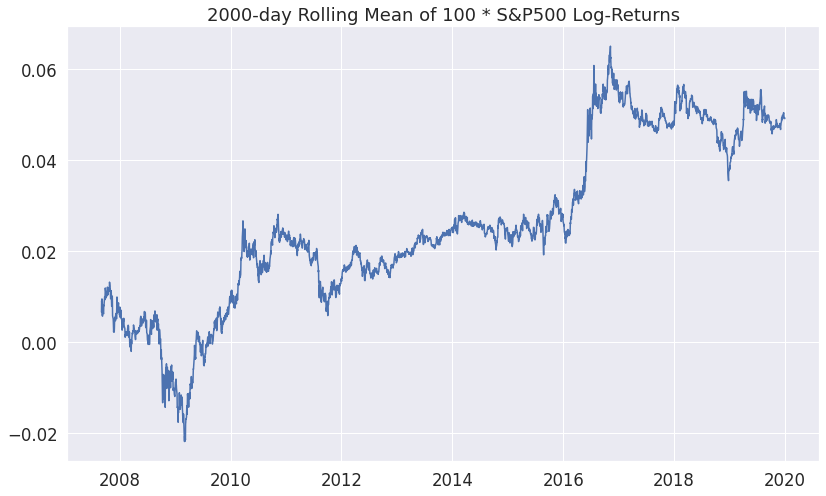

In [29]:
fig, ax = plt.subplots(figsize = (12, 8))
window_size = 2000
ax.plot((100 * log_returns).rolling(window_size).mean())
ax.set_title(f'{window_size}-day Rolling Mean of 100 * S&P500 Log-Returns')

The plot above is surprisingly linear. Here, we shall consider whether fitting a linear trend for the mean via OLS improves the performance of the model relative to a constant-mean model. We keep all other aspects of the model the same, fitting a $\text{GARCH}(1,1)$ model for the volatility and prescribing a skew-$t$ distribution for the standardised residuals.

Note that the `arch` package assumes the series being modelled is already stationary. Thus, we shall be comparing a model of the log-returns against a model of the log-returns minus a linear trend (estimated by OLS). The former has already been done above, giving an AIC of 

In [30]:
print(f"AIC = {results['skewt'].aic:.3f}")

AIC = 13635.474


We estimate the linear trend in the 2000-day rolling average above and subtract it from the mean stationary. We shall regress on the date (converted to UNIX time to get a numerical covariate):

In [31]:
y = (log_returns * 100).rolling(window_size).mean().dropna()
x = y.index.astype(np.int64) // 10**9
X = sm.add_constant(x)
ols_model = sm.OLS(y,X).fit()

We plot with the estimated parameters to gauge the goodness-of-fit:

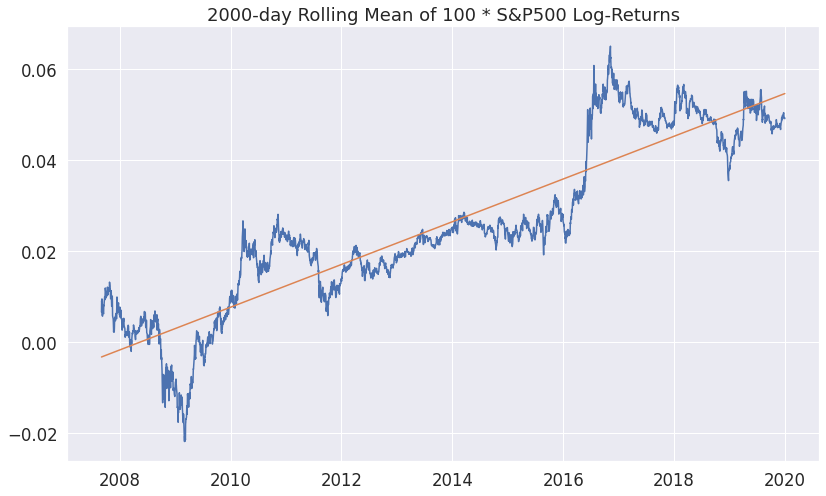

In [32]:
ols_params = ols_model.params
ax.plot(y.index, ols_params[0] + ols_params[1] * x)
fig

Note that we are not so worried about the distribution of the OLS residuals as their distribution will be accounted for in the volatility model. We now construct a GARCH model for the log-returns with this linear trend subtracted off.

In [33]:
params = {'mean': 'Constant',
          'vol': 'Garch',
          'dist': 'skewt',
          'p': 1,
          'q': 1,
          'power': 2}

z = 100 * log_returns
covariate = (100 * log_returns).index.astype(np.int64) // 10**9
linear_trend = ols_params[0] + ols_params[1] * covariate

model = arch.arch_model(100 * log_returns - linear_trend, **params)
results = model.fit(disp = 'off')

The AIC of this model is

In [34]:
print(f'AIC = {results.aic:.3f}')

AIC = 13634.938


We see that we have gained negligible improvements over the base model, at the expense of needing to estimate an extra paramter. The resason for these negligible gains is probably due to the fact that we regressed on a long moving average but extrapolated those coefficients to fit to daily data. It is probably not worth the effort of evaluating and subtracting this linear trend.

Although we shall not cover it here, it is simple to modify the above to subtract a moving average from the log-returns. However, one finds that the trend is so weak that neither subtracting a simple moving average (sma) nor subtracting an exponentially weighted moving average(ewma) improves the model appreciably.

We thus conclude that a constant mean model is sufficient for modelling this data.

## Choosing the Volatility Model

Thus far, we have concluded that a constant mean model whose residuals follow a skew-$t$ distribution performs the best out of the possible candidaes that we have tried. Here, we modify the final aspect of a GARCH model; the volatilty model.

In the tests above, we have always assumed a $\text{GARCH}(1,1)$ process for the volatility process. Actually, strictly speaking, we have modelled the *variance* with a $\text{GARCH}(1,1)$ process. Here, we consider the effects of two common extensions of the standard GARCH model:

1) GJR-GARCH for modelling asymmetric impulses

2) TARCH for modelling the *volatility* process directly.

We begin with the $\text{GJR-GARCH}(1,1,1)$ model

$$
\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2 + \gamma \epsilon_{t - 1}^2 I_{\epsilon_{t-1} < 0}\,,
$$

In the `arch_model` constructor, this is specified by a non-zero `o` argument (the default is `o = 0`):

In [35]:
gjr_params = {'mean': 'Constant',
              'vol': 'Garch',
              'dist': 'skewt',
              'o': 1,
              'p': 1,
              'q': 1}

gjr = arch.arch_model(100 * log_returns, **gjr_params).fit(disp = 'off')

We see that the AIC indicates a marked improvement over previous models:

In [36]:
print(f'AIC = {gjr.aic:.3f}')

AIC = 13436.613


The TARCH model is specified by a `power = 1` parameter to indicate that we are estimating the first power of the volatility (the default is `power = 2` to indicate that the variance process is being modelled). To capitalise on the improvements of the GJR-GARCH model, we shall consider a GJR-GARCH/TARCH hybrid and include an asymmetric shock term as well.

In [37]:
tarch_params = {'mean': 'Constant',
                'vol': 'Garch',
                'dist': 'skewt',
                'o': 1,
                'p': 1,
                'q': 1,
                'power': 1}

tarch = arch.arch_model(100 * log_returns, **tarch_params).fit(disp = 'off')

This gives the best performing model of all the ones we tested and so we shall use this one in our forecasts:

In [38]:
print(f'AIC = {tarch.aic:.3f}')

AIC = 13368.654


We summarise the properties of this model below:

In [39]:
tarch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - TARCH/ZARCH Model Results                        
=========================================================================================
Dep. Variable:                         Adj Close   R-squared:                      -0.000
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                           TARCH/ZARCH   Log-Likelihood:               -6677.33
Distribution:      Standardized Skew Student's t   AIC:                           13368.7
Method:                       Maximum Likelihood   BIC:                           13414.6
                                                   No. Observations:                 5216
Date:                           Mon, Nov 09 2020   Df Residuals:                     5209
Time:                                   15:32:27   Df Model:                            7
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0263  1.014e-02      2.596  9.429e-03 [6.449e-03,4.619e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0234  3.642e-03      6.439  1.205e-10  [1.631e-02,3.059e-02]
alpha[1]   3.8946e-15  9.810e-03  3.970e-13      1.000 [-1.923e-02,1.923e-02]
gamma[1]       0.1890  1.565e-02     12.072  1.484e-33      [  0.158,  0.220]
beta[1]        0.9055  1.005e-02     90.075      0.000      [  0.886,  0.925]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
nu             6.6589      0.633     10.515  7.384e-26    [  5.418,  7.900]
lambda        -0.1313  1.725e-02     -7.613  2.687e-14 [ -0.165,-9.752e-02]
===========================================================================

Covariance estimator: robust
"""

Constant Mean
TARCH/ZARCH(p: 1, o: 1, q: 1)
Standardized Skew Student's t distribution


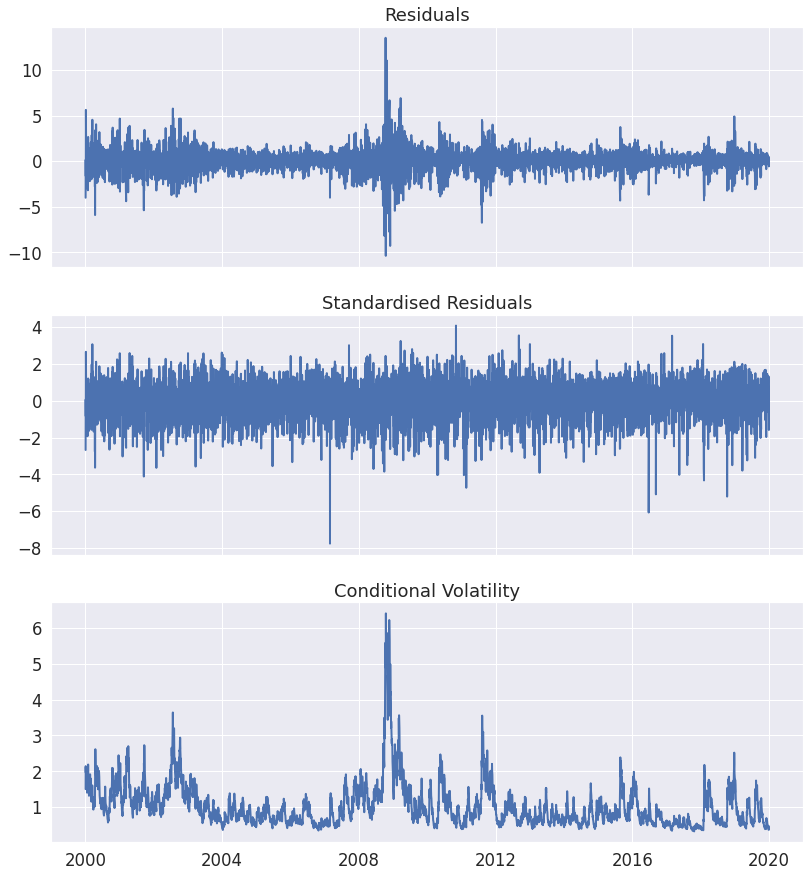

In [40]:
_ = plot_arch_results(tarch)

In [41]:
final_model = tarch

# Forecasting

## Forecasting the Adjusted Close

Having chosen our parameters for the model, we now use it to forecast to a horizon of 20 business days, starting from the end of the data:

In [42]:
num_simulations = 500
horizon = 20
forecast_start_date = data_end_date + pd.tseries.offsets.BDay(1)
forecast_end_date = data_end_date + pd.tseries.offsets.BDay(horizon + 1)

In [43]:
forecasts = final_model.forecast(horizon = horizon,
                                method = 'simulation',
                                simulations = num_simulations)
sims = forecasts.simulations

We now construct a `DataFrame` containing these simulated values. Note that each simulation is held in its own column:

In [44]:
idx = pd.date_range(start = '2020/01/01', periods = 20, freq = 'B')

# Note that we modelled 100 * log_returns and so we need to divide by 100
# to get comparable predictions.
log_returns_sims = pd.DataFrame(sims.values[-1,:,:].T/100, index = idx)
log_returns_sims = log_returns_sims.add_prefix('Sim. ')
log_returns_sims.tail()

,Sim. 0,Sim. 1,Sim. 2,Sim. 3,Sim. 4,Sim. 5,Sim. 6,Sim. 7,Sim. 8,Sim. 9,...,Sim. 490,Sim. 491,Sim. 492,Sim. 493,Sim. 494,Sim. 495,Sim. 496,Sim. 497,Sim. 498,Sim. 499
2020-01-22,-0.013796,0.001945,0.005415,0.005755,0.000109,-0.008803,-0.007851,0.013416,-0.005600,0.003332,...,-0.003112,0.015334,-0.007034,-0.007118,0.007472,0.003072,0.013070,-0.008688,-0.005150,0.002821
2020-01-23,0.000635,0.001349,-0.001692,-0.000374,-0.000899,-0.000767,-0.000928,0.006808,0.009446,-0.000700,...,0.000136,0.005990,0.007967,-0.003490,-0.000071,0.002903,-0.000711,-0.009078,-0.002528,0.004260
2020-01-24,-0.011048,0.001094,0.000974,-0.005652,0.001136,0.010955,0.001709,0.002508,-0.000630,0.001713,...,-0.003270,0.008104,0.003021,-0.002452,0.002573,-0.003779,-0.000608,0.003205,0.000829,-0.000647
2020-01-27,-0.017310,0.003946,-0.001749,0.000901,-0.003177,0.003703,0.010775,0.010832,0.000245,0.001504,...,-0.003808,-0.002715,0.006117,0.004149,0.002387,0.001509,-0.000984,-0.009527,0.001378,0.004060
2020-01-28,0.003009,0.007650,-0.003553,0.014209,0.001344,-0.000753,0.007495,0.005734,0.002890,0.002180,...,-0.004060,0.000767,0.002506,0.005342,-0.000971,0.004295,0.004859,-0.020987,0.011289,-0.000481


We define a helper function to convert log_returns back to raw values:

In [45]:
def log_returns_to_raw(log_returns, x0):
    """
    Convert log-returns to raw values, starting at `x0`
    
    Parameters
    ----------
    log_returns : pd.DataFrame
        DataFrame of log-returns.
        
    x0 : float
        Initial value to compute returns from.
    
    Returns
    -------
    pd.DataFrame
        Transforemed DataFrame containing raw values.
    """
    
    return x0 * log_returns.cumsum().apply(np.exp)

In [46]:
start_val = sp500['Adj Close'][-1]
adj_close_sims = log_returns_to_raw(log_returns_sims, start_val)
adj_close_sims.tail()

,Sim. 0,Sim. 1,Sim. 2,Sim. 3,Sim. 4,Sim. 5,Sim. 6,Sim. 7,Sim. 8,Sim. 9,...,Sim. 490,Sim. 491,Sim. 492,Sim. 493,Sim. 494,Sim. 495,Sim. 496,Sim. 497,Sim. 498,Sim. 499
2020-01-22,304.250544,321.512638,330.627771,314.132833,321.705384,309.886200,305.041700,327.622540,317.938836,320.026761,...,307.417964,312.977471,320.311300,320.992629,322.476657,323.258773,318.579054,311.177280,315.108946,321.346208
2020-01-23,304.443676,321.946687,330.068744,314.015280,321.416453,309.648461,304.758889,329.860741,320.956311,319.802755,...,307.459712,314.857745,322.873283,319.874414,322.453686,324.198514,318.352536,308.365059,314.313266,322.718086
2020-01-24,301.098807,322.298964,330.390304,312.245411,321.781867,313.059374,305.280291,330.689170,320.754022,320.350911,...,306.455983,317.419760,323.850067,319.091139,323.284582,322.975754,318.159103,309.354944,314.573878,322.509225
2020-01-27,295.931626,323.573300,329.812821,312.526852,320.761310,314.220889,308.587496,334.290517,320.832459,320.833037,...,305.291066,316.559211,325.837083,320.417940,324.057335,323.463469,317.846177,306.421696,315.007760,323.821373
2020-01-28,296.823436,326.058206,328.643096,316.999209,321.192645,313.984394,310.909140,336.212892,321.761103,321.533080,...,304.054057,316.802187,326.654815,322.134311,323.742782,324.855572,319.394247,300.057744,318.584051,323.665806


As a sanity check, we plot a sample of these forecasted `Adj Close` values (plotting only 10th simulation to save time):

In [47]:
def plot_simulation(data, sim):
    """
    Plots a line graph of `data` and each simulatio in `sim`. 
    Optionally, plots a boxplot of the terminal distribution of
    the simulations.
    
    Parameters
    ----------
    data : 1d tuple
        Historic data to plot.
        
    sim : pd.DataFrame
        Simulated simulations, stored as a DataFrame
        
    Returns
    -------
    fig : plt.figure.Figure
        Figure instance
        
    (ax1, ax2) : tuple of plt.axes.Axes
        Axes containing plots. `ax1` containes line graphs.
        `ax2` contains the boxplot.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8),
                              gridspec_kw = {'width_ratios': (6, 1)},
                              sharey = True
                              )
    ax1.plot(data)
    sim.plot(ax = ax1, legend = None, alpha = 0.2)
    ax2.boxplot(sim.iloc[-1], widths = 0.3, labels = [''])

    # Add info
    ax1.set_title('Historic and Simulated Values')
    ax1.set_ylabel('Value')
    fig.subplots_adjust(wspace = 0.05)
    return fig, (ax1, ax2)

Text(0, 0.5, 'Adj. Close')

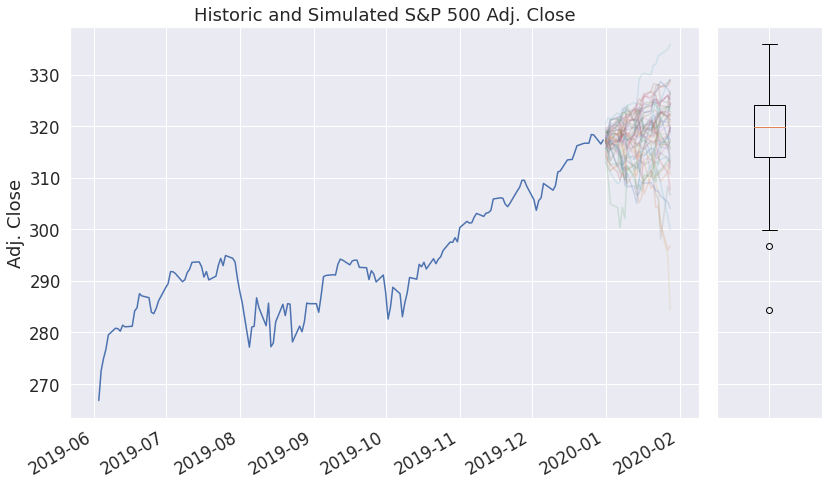

In [48]:
# Plot the historic price to 2020/01/01 and every 10th simulation to 2020/28/01.
# Plot distribution of terminal values of simulations
dat = sp500['Adj Close']['2019/06/01':]
sim = adj_close_sims.iloc[:, ::10]
fig, (ax1, ax2) = plot_simulation(dat, sim)

# Add info
ax1.set_title('Historic and Simulated S&P 500 Adj. Close')
ax1.set_ylabel('Adj. Close')

## Terminal Distribution of the Forecasts

We shall now select out a number of points in time to better gauge the evolution of the simulations:

In [49]:
fc_horizons = [0, 4, 9, 14, 19]

We aggregate relevant information for easier plotting:

In [50]:
def offset_bdays_from(startdate, n):
    """
    Returns `startdate` offset by specified number of business days.
    If `n` is an integer, returns a single offset date.
    If `n` is an iterable, returns a list of offset dates.
    
    Parameters
    ----------
    startdate : TimeStamp
        Date from which to offset.
        
    n : int or iterable of ints
        Number of business days to offset `startdate` by.
        
    Returns
    -------
    list of pd.TimeStamp
        List of offset dates
    """
    try:
        # If a list of ints is passed, return a list of offset dates.
        iter(n)
        return [(startdate + pd.tseries.offsets.BDay(d)).date() for d in n]
    except TypeError:
        # Else, return a single offset date.
        return (startdate + pd.tseries.offsets.BDay(n)).date()
    

In [51]:
class single_forecast:
    """
    Class to hold a collection of simulations of a single date.
    """
    def __init__(self, horizon, forecast_all):
        """
        Constructor. Converts the desired horizon to the date
        of the horizon, extracts all the simulations of that
        date and fits a KDE to the distribution of those simulations.
        
        Parameters
        ----------
        horizon : int
            Steps from first date of index of `forecast_all`
            
        forecast_all : pd.DataFrame
            DataFrame containing all simulations of all dates,
            from which to extract the forecasts of `horizon` from.
        """
        start_date = forecast_all.index[0].date()
        self.horizon = horizon
        self.date = offset_bdays_from(start_date, horizon)
        self.forecast = forecast_all.loc[self.date]
        self.kde = sm.nonparametric.KDEUnivariate(self.forecast.squeeze())
        self.kde.fit()
        return
        
    def hist(self, xlims = (100, 500), nbins = 20, kde = True):
        """
        Plots a histogram of `self.forecast` of `self.date` and plots
        a KDE on a twinned y-axis.
        
        Parameters
        ----------
        xlims : iterable, optional
            Lower and upper limits of x-axis to plot on
            
        nbins : int, optional
            Number of bins for the histogram
            
        kde : bool, optional
            Wether to plot the KDE on the same axes or not.
        
        Returns
        -------
        fig : plt.figure.Figure
            Figure instance
            
        (ax1, ax2) : tuple of plt.axes.Axes
            Axes of two plots. `ax1` contains histogram of forecasts
            and `ax2` contains fitted KDE of forecasts.
        """
        fig, (ax1a, ax2) = plt.subplots(2, 1, figsize = (12, 8),
                                       sharex = True,
                                       gridspec_kw = {'height_ratios': (4, 1)})
        ax1b = ax1a.twinx()
        fig.subplots_adjust(hspace = 0.05)
        
        # Plot histogram of foreast on left axis and KDE on right axis.
        ax1a.hist(self.forecast, alpha = .4, bins = nbins, label = 'Forecast')
        ax1b.plot(self.kde.support, self.kde.density, label = 'KDE')
        ax2.boxplot(self.forecast, vert = False, widths = 0.5)
        
        # Hide the ticks of the right axis, and align y = 0 of both plots.
        ax1a.set_xlim(xlims)
        ax1b.set_yticks([])
        ax1b.set_ylim(bottom = 0.)
        ax2.set_yticks([])
        
        # Fiddle around with labels to get both axes' labels in one legend.
        h1a, l1a = ax1a.get_legend_handles_labels()
        h1b, l1b = ax1b.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        
        ax1a.legend(h1a + h1b + h2, l1a + l1b + l2, loc = 'best')
        
        # Add information
        ax1a.set_title(f'{self.horizon+1}-step forecast ({self.date})')
        ax1a.set_ylabel('Counts')
        ax2.set_xlabel('Value')
        
        return fig, (ax1a, ax1b, ax2)

    def ecdf(self, x, compliment = False):
        """
        Computes the empirical CDF at `val` of the Series `ser`.
        Optionally, can return the compimentary emprical CDF.

        Paramters
        ---------
        val : float
            Value at which to compute the eCDF.
        
        compliment: bool, optional
            Whether to return the eCDF or complementary eCDF.
        
        Returns
        -------
        float
            Probability of measuring less than, or equal, to `val`,
            given the dataset `ser`.
        """
        ecdf = sd.empirical_distribution.ECDF(self.forecast)
        return 1. - ecdf(x) if compliment else ecdf(x)

In [52]:
class forecast_container():
    """
    Container for individual forecasts.
    """
    def __init__(self, horizons, forecast_all):
        """
        Constructor. Constructs a `single_forecast` for each horizon
        in `horizons`.
        
        Parameters
        ----------
        horizons : iterable
            Iterable of horizons to compute `single_forecast` for.
            
        forecast_all : pd.DateFrame
            DataFrame containing all simulations of all dates,
            from which to extract the forecasts of `horizon` from.
        """
        self.forecasts = dict()
        for x in horizons:
            fc = single_forecast(x, forecast_all)
            self.forecasts[fc.date] = fc

    def __iter__(self):
        """
        Iterate over each `single_forecast` in the container.
        
        Yields
        ------
        single_forecast or StopIteration exception
            Next `single_forecast` in the collection or a
            StopIteration exception if there are none left.
        """
        yield from self.forecasts.values()
        
    def kde(self, xlims = (100, 500)):
        """
        Plots the KDE of all `single_forecast` in the collection.
        
        Parameters
        ----------
        xlims : iterable, optional
            Iterable containing lower and upper limits of x-axis.
        
        Returns
        -------
        fig : plt.figure.Figure
            Figure instance
            
        ax : plt.axes.Axes
            Axes instance containing all the KDEs on one plot.
        """
        fig, ax = plt.subplots(figsize = (12, 8))
        
        
        for date, fc in self.forecasts.items():
            label = f'{fc.horizon + 1}-step Forecast ({date})'
            ax.fill(fc.kde.support,
                   fc.kde.density,
                   alpha = 0.5,
                   label = label)

        ax.set_xlim(xlims)
        ax.set_title('Evolution of Distribution of Forecasts')
        ax.set_ylabel('Probability')
        ax.set_xlabel('Value')
        ax.legend(loc = 'best')
        return fig, ax
    
    def eval_prob_gt(self, targets_dict):
        """
        Evaluate the probabilities of hitting `targets`, given the forecast.

        Parameters
        ----------
        targets_dict : dict
            Dict of dates and target values

        forecasts_all : pd.DataFrame
            Forecasted values
        
        Returns
        -------
        prob_gt : dict
            dict with key = date and value = tuple(target value, probability)
            given the forecast.
        """
        prob_gt = pd.DataFrame(columns = ['Target', 'P(x > Target)'])
        for date, target in targets_dict.items():
            try:
                ccdf = self.forecasts[date].ecdf(target, compliment = True)
                prob_gt.loc[date] = [target, ccdf]
            except KeyError:
                print(f'No simulation for {date}')

        return prob_gt

In [53]:
sample_fc = forecast_container(fc_horizons, adj_close_sims)

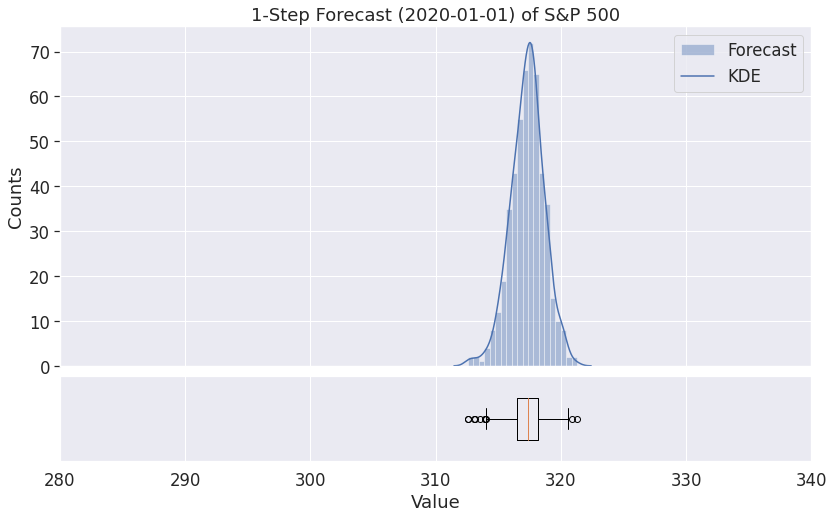

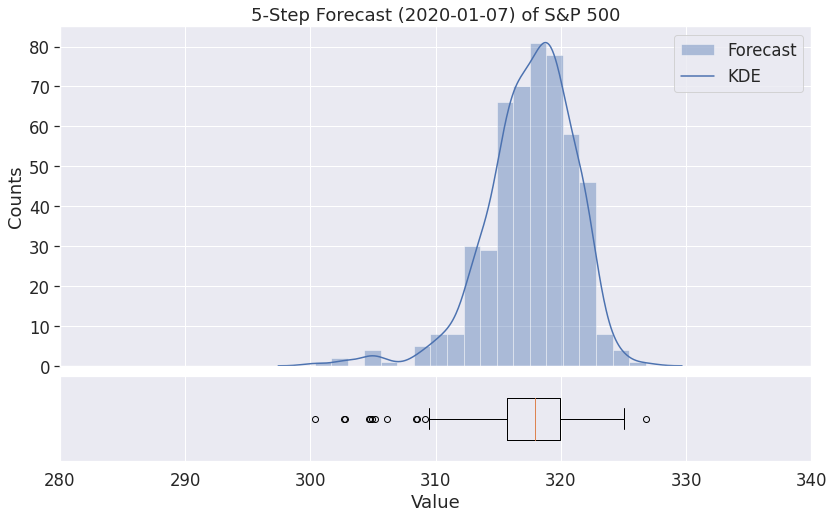

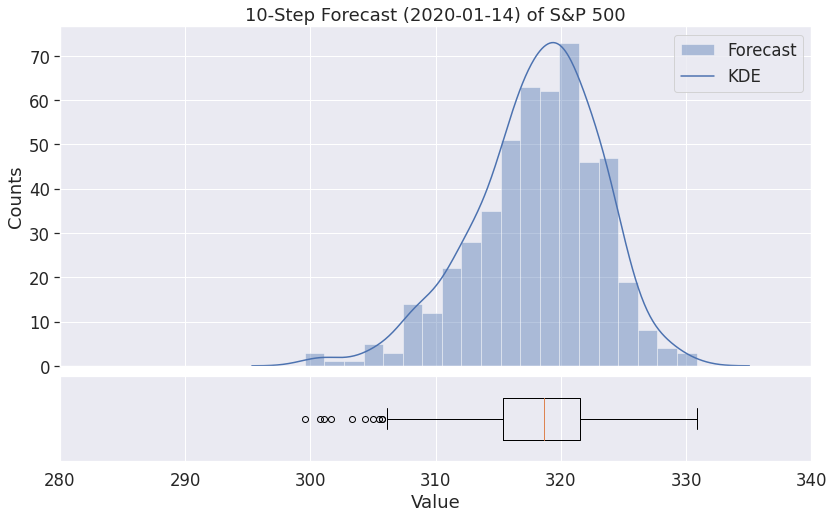

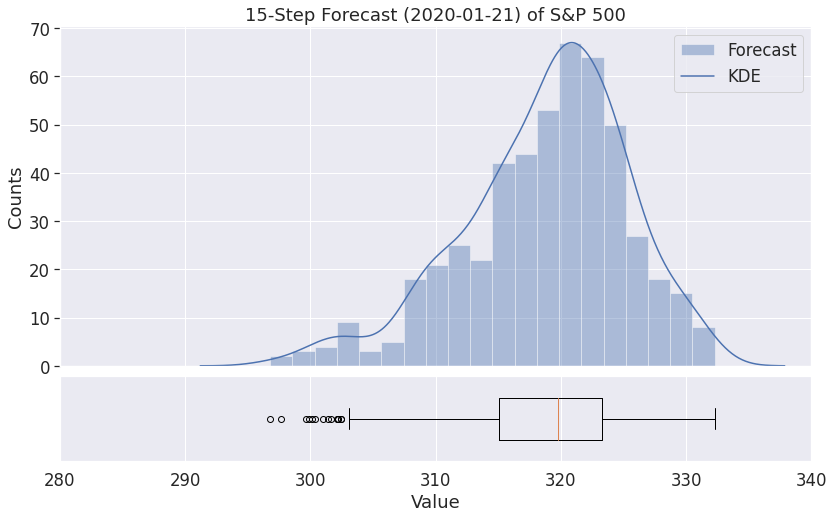

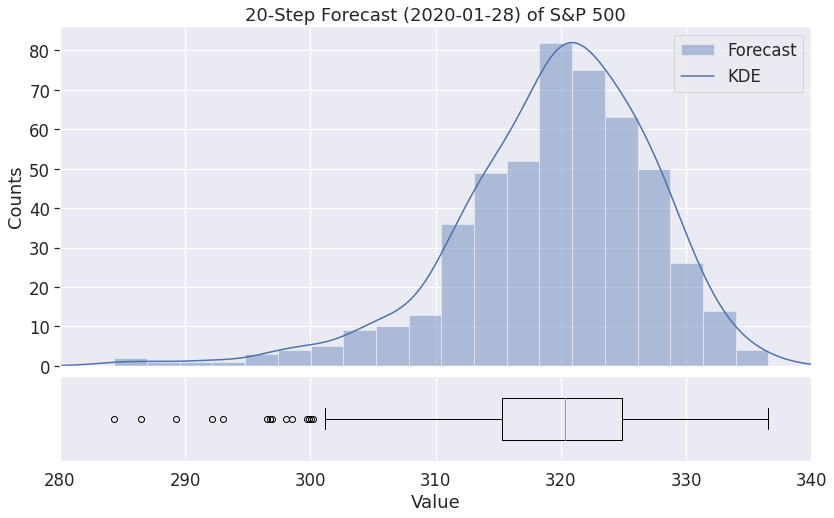

In [54]:
xlims = [280, 340]
for fc in sample_fc:
    fig, (ax, _, _) = fc.hist(xlims)
    ax.set_title(f'{fc.horizon + 1}-Step Forecast ({fc.date}) of S&P 500')

For a nicer visual of the evolution of the distribution of the forecasts, we can plot the KDEs stacked on a single plot:

Text(0.5, 1.0, 'Evolution of the Forecasted Distribution of S&P500')

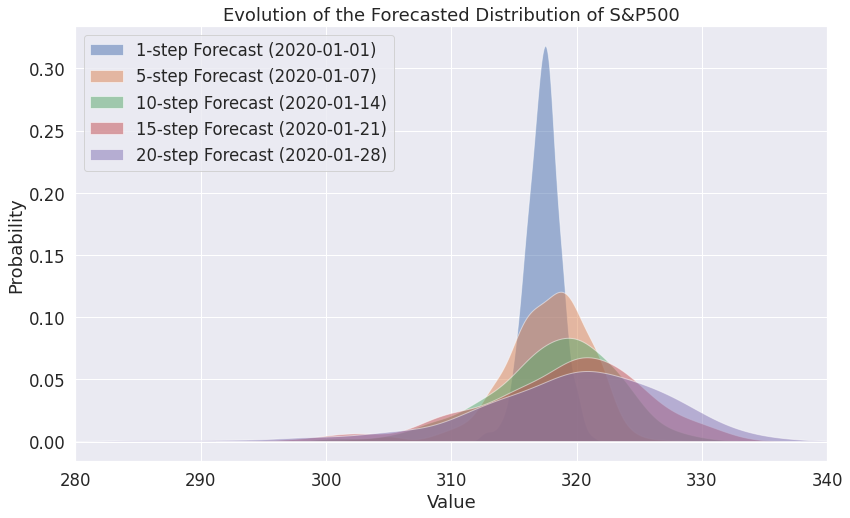

In [55]:
fig, ax = sample_fc.kde(xlims)
ax.set_title('Evolution of the Forecasted Distribution of S&P500')

We see that the distribution of the forecasts spreads as we forecast further into the furture, as expected, but that there is a clear upward shift of the mode that is visible even for the relatively short horizons that we consider here.

## Comparision with the Realisation

In this section, we retrieve the realised prices for the forecast window and study how likely its trajectory was, compared to our forecasts made on 2020/01/01.

In [56]:
spy_validation = web.get_data_yahoo('SPY',
                                    start = forecast_start_date,
                                    end = forecast_end_date)

We retrieve the realised values and collect them in `targets_dict`:

In [57]:
dates = offset_bdays_from(forecast_start_date, fc_horizons[1:])
targets_dict = {d : spy_validation['Adj Close'].loc[d] for d in dates}

Finally, we compute the

In [58]:
sample_fc.eval_prob_gt(targets_dict)

,Target,P(x > Target)
2020-01-07,318.164032,0.482
2020-01-14,322.817261,0.170
2020-01-21,326.612793,0.090
2020-01-28,322.265198,0.384


We see that the realised values of the SPY500 were relatively good until at least 2020/01/21, given the forecasts, with only about 9% of simulations exceeding the observed value on that date. However, in the week that followed, the performance fell to below the median of all the simulations by 2020/01/28.

The method `forecast_container.eval_prob_gt()` can be used to, for example, evalute the probablity of landing ITM on an option expiring on a specified date. For example (ignoring the fact that we have been working with the adjusted close), given that the price on 2019/31/12 was 317.06 and the strike price of a vanilla option expiring on 2020/01/28 was 330, the probability of ending ITM is

In [59]:
strike = 330
expiry = pd.Timestamp('2020/01/28').date()

In [60]:
sample_fc.eval_prob_gt({expiry:strike})

,Target,P(x > Target)
2020-01-28,330.0,0.054


or about 5%. Note this is the physical probability $\mathbb{P}$, rather than the risk-neutral probability $\mathbb{Q}$.